## Processing the Data

In [2]:
import pandas as pd
from datetime import *
from pandas_datareader.data import DataReader
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import spacy
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob

import collections
import seaborn as sns

import nltk
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
from nltk.classify import ClassifierI

In [5]:
## Test for 1 csv file first, later can loop thru all
df = pd.read_csv("../../Raw Data/Financial News/AAPL.csv")
company = "Apple"  ## MAKE SURE TO MAKE THIS DYNAMIC

In [6]:
df.head()

,Unnamed: 0,company,Date,main_headline,absract,num_hits,word_count
0,0,Apple,2019-12-13T10:00:18+0000,How the Big Apple Circus Ringmaster Spends Her...,"It’s a two-show day for Storm Marrero, who com...",2301,806
1,1,Apple,2019-12-06T18:51:42+0000,Why Apple Scrapped the Release of Its Oscar Co...,A fact-based story starring Samuel L. Jackson ...,2301,1488
2,2,Apple,2019-12-11T15:45:38+0000,Apple AirPods Pro Review: The ‘Hearable’ at It...,"At $249, Apple’s noise-canceling wireless earb...",2301,1011
3,3,Apple,2019-12-02T16:49:26+0000,"Fire Blight Spreads Northward, Threatening App...",Growers in northern states are combating virul...,2301,1623
4,4,Apple,2019-11-28T07:39:04+0000,"Apple, Bowing to Russian Pressure, Recognizes ...","The tech giant, following Google and others, h...",2301,809


In [7]:
df["main_headline"]

0      How the Big Apple Circus Ringmaster Spends Her...
1      Why Apple Scrapped the Release of Its Oscar Co...
2      Apple AirPods Pro Review: The ‘Hearable’ at It...
3      Fire Blight Spreads Northward, Threatening App...
4      Apple, Bowing to Russian Pressure, Recognizes ...
5                    Trump’s Bizarre Apple Factory Visit
6      Apple Pulls Samuel L. Jackson Movie From Festi...
7               No, That Mac Factory in Texas Is Not New
8      Trump Floats Tariff Exclusions for Apple at Te...
9      Apple TV Plus and Disney Plus: What Shows Are ...
10               Apple’s Reach Reshapes Medical Research
11               Apple to Ban Vaping Apps From Its Store
12     Richard Plepler, Former HBO Boss, Is Close to ...
13     Apple Card Investigated After Gender Discrimin...
14     Apple Commits $2.5 Billion to Ease California ...
15           Review: The Big Apple Circus Still Delivers
16     Behind Apple’s ‘Slow-Roll’ Marketing Push for ...
17     Apple Enters Show Busine

In [8]:
## visualize each col in the first row
row1 = df.loc[0,]
abstract1 = row1[4]
for item in row1:
    print(item)

0
Apple
2019-12-13T10:00:18+0000
How the Big Apple Circus Ringmaster Spends Her Sundays
It’s a two-show day for Storm Marrero, who commutes from the Bronx before suiting up in sequins and singing Celia Cruz.
2301
806


### 1. Sort the data according to timestamp

In [9]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,company,Date,main_headline,absract,num_hits,word_count
0,Apple,2019-12-13T10:00:18+0000,How the Big Apple Circus Ringmaster Spends Her...,"It’s a two-show day for Storm Marrero, who com...",2301,806
1,Apple,2019-12-06T18:51:42+0000,Why Apple Scrapped the Release of Its Oscar Co...,A fact-based story starring Samuel L. Jackson ...,2301,1488
2,Apple,2019-12-11T15:45:38+0000,Apple AirPods Pro Review: The ‘Hearable’ at It...,"At $249, Apple’s noise-canceling wireless earb...",2301,1011
3,Apple,2019-12-02T16:49:26+0000,"Fire Blight Spreads Northward, Threatening App...",Growers in northern states are combating virul...,2301,1623
4,Apple,2019-11-28T07:39:04+0000,"Apple, Bowing to Russian Pressure, Recognizes ...","The tech giant, following Google and others, h...",2301,809


In [17]:
df[["company", "Date", "main_headline", "absract", "word_count"]].loc[4:8,].reset_index(drop=True)

,company,Date,main_headline,absract,word_count
0,Apple,2019-11-28T07:39:04+0000,"Apple, Bowing to Russian Pressure, Recognizes ...","The tech giant, following Google and others, h...",809
1,Apple,2019-11-21T11:27:32+0000,Trump’s Bizarre Apple Factory Visit,President Trump didn’t rule out exempting Appl...,2311
2,Apple,2019-11-21T01:19:33+0000,Apple Pulls Samuel L. Jackson Movie From Festi...,"“The Banker,” one of the tech giant’s first fo...",485
3,Apple,2019-11-21T03:16:10+0000,"No, That Mac Factory in Texas Is Not New",President Trump said on Wednesday that he open...,837
4,Apple,2019-11-21T02:01:44+0000,Trump Floats Tariff Exclusions for Apple at Te...,The president suggested that a trade deal with...,885


In [131]:
def getDate(x):
    return datetime.strptime(x[0:10], "%Y-%m-%d")
df["Date"] = df["Date"].apply(getDate)

In [132]:
df.sort_values(by="Date", inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,company,Date,main_headline,absract,num_hits,word_count
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,2301,449
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,2301,440
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",2301,404
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,2301,294
4,Apple,2010-01-23,The Apple Guessing Game,What might Apple be announcing this week? It s...,2301,499


In [133]:
df.drop(columns=["num_hits"], inplace=True)
df.head()

,company,Date,main_headline,absract,word_count
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,449
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,440
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",404
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,294
4,Apple,2010-01-23,The Apple Guessing Game,What might Apple be announcing this week? It s...,499


In [134]:
df

,company,Date,main_headline,absract,word_count
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,449
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,440
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",404
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,294
4,Apple,2010-01-23,The Apple Guessing Game,What might Apple be announcing this week? It s...,499
5,Apple,2010-01-25,Laptop Sales Help Apple Top Forecasts,The continued worldwide popularity of the iPho...,290
6,Apple,2010-01-25,Play Our Unofficial Apple Tablet Game!,"Sports fans have the Super Bowl, and nerds hav...",307
7,Apple,2010-01-26,"If Apple Releases It, Will Developers Come?",An Apple tablet will give developers a bigger ...,301
8,Apple,2010-01-26,Apple's Upcoming Announcement,Bruce Headlam and Stephanie Clifford of The Ti...,0
9,Apple,2010-01-26,"With Apple Tablet, Print Media Hope for a Payday",Apple is expected to market its tablet compute...,1284


### 1b. Named Entity Recognition
Make sure that the news articles are indeed talking about that company

In [135]:
## POS Tagging

# python -m spacy download en_core_web_sm   <---- user gotta download this first

In [136]:
## IGNORE CELL - just to find my bloody english directory

os.listdir("C:/Users/ksjag/Anaconda3/Lib/site-packages")

['absl',
 'absl_py-0.5.0-py3.6.egg-info',
 'absl_py-0.5.0.dist-info',
 'adodbapi',
 'alabaster',
 'alabaster-0.7.11.dist-info',
 'anaconda_client-1.7.1-py3.6.egg-info',
 'anaconda_navigator',
 'anaconda_navigator-1.8.7-py3.6.egg-info',
 'anaconda_project',
 'anaconda_project-0.8.2-py3.6.egg-info',
 'appdirs-1.4.3-py3.6.egg-info',
 'appdirs.py',
 'asn1crypto',
 'asn1crypto-0.24.0-py3.6.egg-info',
 'astor',
 'astor-0.7.1.dist-info',
 'astroid',
 'astroid-2.0.4.dist-info',
 'astropy',
 'astropy-3.0.4-py3.6.egg-info',
 'atomicwrites',
 'atomicwrites-1.1.5-py3.6.egg-info',
 'attr',
 'attrs-18.1.0-py3.6.egg-info',
 'automat',
 'Automat-0.7.0-py3.6.egg-info',
 'babel',
 'Babel-2.6.0-py3.6.egg-info',
 'backcall',
 'backcall-0.1.0-py3.6.egg-info',
 'backports',
 'backports.shutil_get_terminal_size-1.0.0.dist-info',
 'beautifulsoup4-4.6.3.dist-info',
 'bin',
 'binstar_client',
 'bitarray',
 'bitarray-0.8.3-py3.6.egg-info',
 'bkcharts',
 'bkcharts-0.2-py3.6.egg-info',
 'blaze',
 'blaze-0.11.3-py3

In [137]:
nlp = spacy.load("C:/Users/ksjag/Anaconda3/Lib/site-packages/en_core_web_sm/en_core_web_sm-2.2.5")

In [138]:
noun_or_not = []   ## store the pos_

for row in range(len(df)):
    this_headline = df.loc[row,"main_headline"]
    this_doc  = nlp(this_headline)
    
    done = False
    for token in this_doc:
        if str(token)[0:len(company)].lower() == company.lower():
            noun_or_not.append(token.pos_)
            done = True
            break
    if done == False:
        noun_or_not.append("remove")

In [139]:
noun_or_not

['PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'NOUN',
 'PROPN',
 'PROPN',
 'NOUN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PROPN',
 'PRO

In [140]:
print(len(noun_or_not))
print(len(df))

1000
1000


In [141]:
## filter out the rows in the df where company name is not a proper noun
df = pd.concat([df.reset_index(drop=True), pd.DataFrame(noun_or_not, columns=["noun_or_not"])], axis=1)
df.head()

,company,Date,main_headline,absract,word_count,noun_or_not
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,449,PROPN
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,440,PROPN
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",404,PROPN
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,294,PROPN
4,Apple,2010-01-23,The Apple Guessing Game,What might Apple be announcing this week? It s...,499,PROPN


In [142]:
## drop those rows where noun_or_not is not PROPN
df = df[df.noun_or_not == "PROPN"]

In [143]:
df.drop(["noun_or_not"], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

In [144]:
df.head()

,company,Date,main_headline,absract,word_count
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,449
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,440
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",404
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,294
4,Apple,2010-01-23,The Apple Guessing Game,What might Apple be announcing this week? It s...,499


### 2. Stitch in Stock price history and calculate returns

In [145]:
yahoo_url = "https://finance.yahoo.com/quote/%5EDJI/components/"
djia_table = pd.read_html(yahoo_url, header=0, index_col=0)[0]
djia_table = djia_table.reset_index()
djia_table.head()
#djia_table.shape

,Symbol,Company Name,Last Price,Change,% Change,Volume
0,DOW,Dow Inc.,30.60,0.07,+0.23%,2556982
1,VZ,Verizon Communications Inc.,55.53,-0.30,-0.54%,4597366
2,CAT,Caterpillar Inc.,104.67,0.60,+0.57%,1305528
3,PFE,Pfizer Inc.,34.12,0.36,+1.07%,6030450
4,JNJ,Johnson & Johnson,137.91,1.47,+1.08%,2203842


In [146]:
def get_data_for_multiple_stocks(tickers):
    '''
    Obtain stocks information (Date, OHLC, Volume and Adjusted Close). 
    Uses Pandas DataReader to make an API Call to Yahoo Finance and download the data directly.
    Computes other values - Log Return and Arithmetic Return.
    
    Input: List of Stock Tickers
    Output: A dictionary of dataframes for each stock
    '''
    stocks = dict()
    for ticker in tickers:
        s = DataReader(ticker, 'yahoo', start_date, end_date)
        s.insert(0, "Ticker", ticker)  #insert ticker column so you can reference better later
        s['Date'] = pd.to_datetime(s.index) #useful for transformation later
        s['Adj Prev Close'] = s['Adj Close'].shift(1)
        s['Log Return'] = np.log(s['Adj Close']/s['Adj Prev Close'])
        s['Return'] = (s['Adj Close']/s['Adj Prev Close']-1)
        s = s.reset_index(drop=True)
        
        cols = list(s.columns.values) # re-arrange columns
        cols.remove("Date")
        s = s[["Date"] + cols]
        
        stocks[ticker] = s
        
    return stocks

In [147]:
start_date = "2010-01-01"
end_date = "2019-12-31"
apple_appl = get_data_for_multiple_stocks(["AAPL"])
apple_appl

{'AAPL':            Date Ticker        High         Low        Open       Close  \
 0    2009-12-31   AAPL   30.478571   30.080000   30.447144   30.104286   
 1    2010-01-04   AAPL   30.642857   30.340000   30.490000   30.572857   
 2    2010-01-05   AAPL   30.798571   30.464285   30.657143   30.625713   
 3    2010-01-06   AAPL   30.747143   30.107143   30.625713   30.138571   
 4    2010-01-07   AAPL   30.285715   29.864286   30.250000   30.082857   
 5    2010-01-08   AAPL   30.285715   29.865715   30.042856   30.282858   
 6    2010-01-11   AAPL   30.428572   29.778572   30.400000   30.015715   
 7    2010-01-12   AAPL   29.967142   29.488571   29.884285   29.674286   
 8    2010-01-13   AAPL   30.132856   29.157143   29.695715   30.092857   
 9    2010-01-14   AAPL   30.065714   29.860001   30.015715   29.918571   
 10   2010-01-15   AAPL   30.228571   29.410000   30.132856   29.418571   
 11   2010-01-19   AAPL   30.741428   29.605715   29.761429   30.719999   
 12   2010-01-20 

In [148]:
apple_prices = apple_appl["AAPL"]
apple_prices.head()

,Date,Ticker,High,Low,Open,Close,Volume,Adj Close,Adj Prev Close,Log Return,Return
0,2009-12-31,AAPL,30.478571,30.080000,30.447144,30.104286,88102700.0,26.131752,NaN,NaN,NaN
1,2010-01-04,AAPL,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483,26.131752,0.015445,0.015565
2,2010-01-05,AAPL,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366,26.538483,0.001727,0.001729
3,2010-01-06,AAPL,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509,26.584366,-0.016034,-0.015906
4,2010-01-07,AAPL,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146,26.161509,-0.001850,-0.001849


In [149]:
## join prev adj close and Return columns with nlp dataframe
## merge on Date
apple_relevant_info = apple_prices[["Date", "Adj Close", "Adj Prev Close", "Return"]]
df = pd.merge(df, apple_relevant_info, how='inner', on='Date')
df

,company,Date,main_headline,absract,word_count,Adj Close,Adj Prev Close,Return
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,449,26.584366,26.538483,0.001729
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,440,26.161509,26.584366,-0.015906
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",404,26.161509,26.584366,-0.015906
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,294,26.666212,25.536520,0.044238
4,Apple,2010-01-25,Play Our Unofficial Apple Tablet Game!,"Sports fans have the Super Bowl, and nerds hav...",307,25.181866,24.522150,0.026903
5,Apple,2010-01-26,"If Apple Releases It, Will Developers Come?",An Apple tablet will give developers a bigger ...,301,25.537760,25.181866,0.014133
6,Apple,2010-01-26,Apple's Upcoming Announcement,Bruce Headlam and Stephanie Clifford of The Ti...,0,25.537760,25.181866,0.014133
7,Apple,2010-01-26,"With Apple Tablet, Print Media Hope for a Payday",Apple is expected to market its tablet compute...,1284,25.537760,25.181866,0.014133
8,Apple,2010-01-27,Get Your Non-Apple News,Five news stories of other non-Apple tablet ne...,204,25.778330,25.537760,0.009420
9,Apple,2010-01-27,The Apple iPad: First Impressions,Some wild speculations of a guy who’s never ev...,787,25.778330,25.537760,0.009420


In [150]:
## if it on the same day, concat the headlines and the abstracts
df["text_label"] = df["main_headline"] + ". " + df["absract"]
df.head()

,company,Date,main_headline,absract,word_count,Adj Close,Adj Prev Close,Return,text_label
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,449,26.584366,26.538483,0.001729,"Apple Buys Quattro, an Ad Firm. While Google i..."
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,440,26.161509,26.584366,-0.015906,"Apple Buys Quattro, an Ad Firm. Apple encroach..."
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",404,26.161509,26.584366,-0.015906,Putting the “i” in Apple. iSlate has plenty of...
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,294,26.666212,25.536520,0.044238,Reading Apple’s Tea Leaves. Take one splatter-...
4,Apple,2010-01-25,Play Our Unofficial Apple Tablet Game!,"Sports fans have the Super Bowl, and nerds hav...",307,25.181866,24.522150,0.026903,Play Our Unofficial Apple Tablet Game!. Sports...


In [151]:
## End up with a list of tokens for each row
## COMPUTE THE LABELS - 1, 0, -1
# lower_threshold = -0.005  #df["Return"].quantile(0.4)
# upper_threshold = 0.005  #df["Return"].quantile(0.6)

# df["Label"] = 0
# df.loc[df["Return"] > upper_threshold, "Label"] = 1
# df.loc[df["Return"] < lower_threshold, "Label"] = -1
df["Label"] = 1
df.loc[df["Return"] < 0, "Label"] = -1
df

,company,Date,main_headline,absract,word_count,Adj Close,Adj Prev Close,Return,text_label,Label
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,449,26.584366,26.538483,0.001729,"Apple Buys Quattro, an Ad Firm. While Google i...",1
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,440,26.161509,26.584366,-0.015906,"Apple Buys Quattro, an Ad Firm. Apple encroach...",-1
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",404,26.161509,26.584366,-0.015906,Putting the “i” in Apple. iSlate has plenty of...,-1
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,294,26.666212,25.536520,0.044238,Reading Apple’s Tea Leaves. Take one splatter-...,1
4,Apple,2010-01-25,Play Our Unofficial Apple Tablet Game!,"Sports fans have the Super Bowl, and nerds hav...",307,25.181866,24.522150,0.026903,Play Our Unofficial Apple Tablet Game!. Sports...,1
5,Apple,2010-01-26,"If Apple Releases It, Will Developers Come?",An Apple tablet will give developers a bigger ...,301,25.537760,25.181866,0.014133,"If Apple Releases It, Will Developers Come?. A...",1
6,Apple,2010-01-26,Apple's Upcoming Announcement,Bruce Headlam and Stephanie Clifford of The Ti...,0,25.537760,25.181866,0.014133,Apple's Upcoming Announcement. Bruce Headlam a...,1
7,Apple,2010-01-26,"With Apple Tablet, Print Media Hope for a Payday",Apple is expected to market its tablet compute...,1284,25.537760,25.181866,0.014133,"With Apple Tablet, Print Media Hope for a Payd...",1
8,Apple,2010-01-27,Get Your Non-Apple News,Five news stories of other non-Apple tablet ne...,204,25.778330,25.537760,0.009420,Get Your Non-Apple News. Five news stories of ...,1
9,Apple,2010-01-27,The Apple iPad: First Impressions,Some wild speculations of a guy who’s never ev...,787,25.778330,25.537760,0.009420,The Apple iPad: First Impressions. Some wild s...,1


In [152]:
df["Label"].value_counts()

-1    412
 1    397
Name: Label, dtype: int64

### 3. Remove stop words, tokenize and vectorize

In [153]:
# use CountVectorizer to create document-term matrices from X_train and X_test



vect = CountVectorizer(ngram_range=(1, 2), stop_words="english", analyzer="word", max_df=0.8)

In [154]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [155]:
df["text_label"], df["Return"]

(0      Apple Buys Quattro, an Ad Firm. While Google i...
 1      Apple Buys Quattro, an Ad Firm. Apple encroach...
 2      Putting the “i” in Apple. iSlate has plenty of...
 3      Reading Apple’s Tea Leaves. Take one splatter-...
 4      Play Our Unofficial Apple Tablet Game!. Sports...
 5      If Apple Releases It, Will Developers Come?. A...
 6      Apple's Upcoming Announcement. Bruce Headlam a...
 7      With Apple Tablet, Print Media Hope for a Payd...
 8      Get Your Non-Apple News. Five news stories of ...
 9      The Apple iPad: First Impressions. Some wild s...
 10     Apple’s iPad Tablet. After months of anticipat...
 11     Demo of the Apple iPad. A quick look at Apple'...
 12     Apple's iPad Tablet. John Markoff and Jenna Wo...
 13     The Blogosphere Reacts to the Apple iPad. A ro...
 14     The Apple iPad: First Impressions. Some wild s...
 15     Seeing Through the Apple (and ‘Avatar’) Hyperb...
 16     For Apple, iPad Said More Than Intended. Other...
 17     A Litt

In [156]:
## do a train-test split on the data
X_train, X_test, y_train, y_test = train_test_split(df["text_label"], df["Label"])

In [157]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(606, 12672)

In [158]:
X_test_dtm = vect.transform(X_test)

In [159]:
### Grid Search on vectorizer parameters
params = {"stop_words": ["english", "char_wb"], "ngram_range":[(1, 1), (1, 2), (1, 2, 3)], "stop_words": ["english", None],
         "max_df":[0.5, 0.8]}
params

{'max_df': [0.5, 0.8],
 'ngram_range': [(1, 1), (1, 2), (1, 2, 3)],
 'stop_words': ['english', None]}

In [160]:
X_train_dtm

<606x12672 sparse matrix of type '<class 'numpy.int64'>'
	with 20119 stored elements in Compressed Sparse Row format>

In [161]:
# print the number of features that were generated
print('Features: ', X_train_dtm.shape[1])

# use Multinomial Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# Get the training accuracy
print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
# print the accuracy of its predictions
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

Features:  12672
Training Accuracy:  1.0
Test Accuracy:  0.46798029556650245


In [162]:
pd.DataFrame({"Actual Labels": y_test, "Predicted Labels": y_pred_class})

,Actual Labels,Predicted Labels
706,1,-1
768,-1,1
528,1,1
225,1,-1
35,-1,-1
550,1,1
568,1,-1
39,-1,-1
250,1,-1
746,1,-1


In [163]:

collections.Counter(y_pred_class)

Counter({-1: 120, 1: 83})

In [164]:
collections.Counter(y_train)

Counter({-1: 316, 1: 290})

In [165]:
collections.Counter(y_test)

Counter({-1: 96, 1: 107})

In [166]:
actual_rtns = df["Return"].loc[y_test.index]
model_rtns = actual_rtns * y_pred_class
print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")


Returns:  85.73485088935826 %


In [167]:
df.head()

,company,Date,main_headline,absract,word_count,Adj Close,Adj Prev Close,Return,text_label,Label
0,Apple,2010-01-05,"Apple Buys Quattro, an Ad Firm",While Google introduced its first piece of har...,449,26.584366,26.538483,0.001729,"Apple Buys Quattro, an Ad Firm. While Google i...",1
1,Apple,2010-01-06,"Apple Buys Quattro, an Ad Firm",Apple encroached upon Google’s turf on Tuesday...,440,26.161509,26.584366,-0.015906,"Apple Buys Quattro, an Ad Firm. Apple encroach...",-1
2,Apple,2010-01-06,Putting the “i” in Apple,"iSlate has plenty of hype, but that name … hmmmm.",404,26.161509,26.584366,-0.015906,Putting the “i” in Apple. iSlate has plenty of...,-1
3,Apple,2010-01-19,Reading Apple’s Tea Leaves,Take one splatter-painted invitation. Add a ne...,294,26.666212,25.536520,0.044238,Reading Apple’s Tea Leaves. Take one splatter-...,1
4,Apple,2010-01-25,Play Our Unofficial Apple Tablet Game!,"Sports fans have the Super Bowl, and nerds hav...",307,25.181866,24.522150,0.026903,Play Our Unofficial Apple Tablet Game!. Sports...,1


### Lemmatize

In [168]:
df_filtered = df[["Date", "word_count", "text_label", "Label", "Return"]]
df_filtered.head()

,Date,word_count,text_label,Label,Return
0,2010-01-05,449,"Apple Buys Quattro, an Ad Firm. While Google i...",1,0.001729
1,2010-01-06,440,"Apple Buys Quattro, an Ad Firm. Apple encroach...",-1,-0.015906
2,2010-01-06,404,Putting the “i” in Apple. iSlate has plenty of...,-1,-0.015906
3,2010-01-19,294,Reading Apple’s Tea Leaves. Take one splatter-...,1,0.044238
4,2010-01-25,307,Play Our Unofficial Apple Tablet Game!. Sports...,1,0.026903


In [169]:

#nltk.download("wordnet")

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [''.join(lemmatizer.lemmatize(w, 'v')) for w in w_tokenizer.tokenize(text)]
def lemmatize_text_str(text):
    string = ''
    for w in w_tokenizer.tokenize(text):
        string = string + ' ' + lemmatizer.lemmatize(w, 'v')
    return string

df_filtered['text_lem_lst'] = df_filtered['text_label'].apply(lemmatize_text)
df_filtered['text_lem_str'] = df_filtered['text_label'].apply(lemmatize_text_str)


C:\Users\ksjag\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\ksjag\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [170]:
df_filtered.head()

,Date,word_count,text_label,Label,Return,text_lem_lst,text_lem_str
0,2010-01-05,449,"Apple Buys Quattro, an Ad Firm. While Google i...",1,0.001729,"[Apple, Buys, Quattro,, an, Ad, Firm., While, ...","Apple Buys Quattro, an Ad Firm. While Google ..."
1,2010-01-06,440,"Apple Buys Quattro, an Ad Firm. Apple encroach...",-1,-0.015906,"[Apple, Buys, Quattro,, an, Ad, Firm., Apple, ...","Apple Buys Quattro, an Ad Firm. Apple encroac..."
2,2010-01-06,404,Putting the “i” in Apple. iSlate has plenty of...,-1,-0.015906,"[Putting, the, “i”, in, Apple., iSlate, have, ...",Putting the “i” in Apple. iSlate have plenty ...
3,2010-01-19,294,Reading Apple’s Tea Leaves. Take one splatter-...,1,0.044238,"[Reading, Apple’s, Tea, Leaves., Take, one, sp...",Reading Apple’s Tea Leaves. Take one splatter...
4,2010-01-25,307,Play Our Unofficial Apple Tablet Game!. Sports...,1,0.026903,"[Play, Our, Unofficial, Apple, Tablet, Game!.,...",Play Our Unofficial Apple Tablet Game!. Sport...


## Sentiment Score

In [172]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    
    # use this line for Python 2 (avoids UnicodeDecodeError for some reviews)
    # blob = TextBlob(text.decode(encoding='utf-8'))
    
    # use this line instead for Python 3
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity

In [173]:
# # create a new DataFrame column for sentiment (WARNING: SLOW!)
# df['sentiment_headline'] = df.headline_lem_str.apply(detect_sentiment)
# df["sentiment_abstract"] = df.abstract_lem_str.apply(detect_sentiment)
#Sentiment is the "attitude" of the speaker:

#polarity ranges from -1 (most negative) to 1 (most positive)
#subjectivity ranges from 0 (very objective) to 1 (very subjective)
df_filtered["sentiment_txtblob"] = df_filtered.text_lem_str.apply(detect_sentiment)
df_filtered.head()

C:\Users\ksjag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,word_count,text_label,Label,Return,text_lem_lst,text_lem_str,sentiment_txtblob
0,2010-01-05,449,"Apple Buys Quattro, an Ad Firm. While Google i...",1,0.001729,"[Apple, Buys, Quattro,, an, Ad, Firm., While, ...","Apple Buys Quattro, an Ad Firm. While Google ...",0.025000
1,2010-01-06,440,"Apple Buys Quattro, an Ad Firm. Apple encroach...",-1,-0.015906,"[Apple, Buys, Quattro,, an, Ad, Firm., Apple, ...","Apple Buys Quattro, an Ad Firm. Apple encroac...",0.100000
2,2010-01-06,404,Putting the “i” in Apple. iSlate has plenty of...,-1,-0.015906,"[Putting, the, “i”, in, Apple., iSlate, have, ...",Putting the “i” in Apple. iSlate have plenty ...,0.000000
3,2010-01-19,294,Reading Apple’s Tea Leaves. Take one splatter-...,1,0.044238,"[Reading, Apple’s, Tea, Leaves., Take, one, sp...",Reading Apple’s Tea Leaves. Take one splatter...,0.500000
4,2010-01-25,307,Play Our Unofficial Apple Tablet Game!. Sports...,1,0.026903,"[Play, Our, Unofficial, Apple, Tablet, Game!.,...",Play Our Unofficial Apple Tablet Game!. Sport...,-0.188889


In [174]:

#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
# df["sentiments_headline_2"] = df.headline_lem_str.apply(lambda x: sid.polarity_scores(x))
# df["sentiment_abstract_2"] = df.abstract_lem_str.apply(lambda x: sid.polarity_scores(x))

df_filtered["sentiment_nltk"] = df_filtered.text_lem_str.apply(lambda x: sid.polarity_scores(x))
df_filtered.head()

C:\Users\ksjag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,word_count,text_label,Label,Return,text_lem_lst,text_lem_str,sentiment_txtblob,sentiment_nltk
0,2010-01-05,449,"Apple Buys Quattro, an Ad Firm. While Google i...",1,0.001729,"[Apple, Buys, Quattro,, an, Ad, Firm., While, ...","Apple Buys Quattro, an Ad Firm. While Google ...",0.025000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2010-01-06,440,"Apple Buys Quattro, an Ad Firm. Apple encroach...",-1,-0.015906,"[Apple, Buys, Quattro,, an, Ad, Firm., Apple, ...","Apple Buys Quattro, an Ad Firm. Apple encroac...",0.100000,"{'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'comp..."
2,2010-01-06,404,Putting the “i” in Apple. iSlate has plenty of...,-1,-0.015906,"[Putting, the, “i”, in, Apple., iSlate, have, ...",Putting the “i” in Apple. iSlate have plenty ...,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2010-01-19,294,Reading Apple’s Tea Leaves. Take one splatter-...,1,0.044238,"[Reading, Apple’s, Tea, Leaves., Take, one, sp...",Reading Apple’s Tea Leaves. Take one splatter...,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2010-01-25,307,Play Our Unofficial Apple Tablet Game!. Sports...,1,0.026903,"[Play, Our, Unofficial, Apple, Tablet, Game!.,...",Play Our Unofficial Apple Tablet Game!. Sport...,-0.188889,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp..."


In [175]:
df_filtered["positivity_sentiment_nltk"] = df_filtered.sentiment_nltk.apply(lambda x: x["pos"])
df_filtered["compound_sentiment_nltk"] = df_filtered.sentiment_nltk.apply(lambda x: x["compound"])
df_filtered["negativity_sentiment_nltk"] = df_filtered.sentiment_nltk.apply(lambda x: x["neg"])
df_filtered["neutral_sentiment_nltk"] = df_filtered.sentiment_nltk.apply(lambda x: x["neu"])
df_filtered.drop(columns=["sentiment_nltk"], inplace=True)


In [177]:
df_filtered.head()

,Date,word_count,text_label,Label,Return,text_lem_lst,text_lem_str,sentiment_txtblob,positivity_sentiment_nltk,compound_sentiment_nltk,negativity_sentiment_nltk,neutral_sentiment_nltk
0,2010-01-05,449,"Apple Buys Quattro, an Ad Firm. While Google i...",1,0.001729,"[Apple, Buys, Quattro,, an, Ad, Firm., While, ...","Apple Buys Quattro, an Ad Firm. While Google ...",0.025000,0.000,0.0000,0.000,1.000
1,2010-01-06,440,"Apple Buys Quattro, an Ad Firm. Apple encroach...",-1,-0.015906,"[Apple, Buys, Quattro,, an, Ad, Firm., Apple, ...","Apple Buys Quattro, an Ad Firm. Apple encroac...",0.100000,0.000,-0.4019,0.072,0.928
2,2010-01-06,404,Putting the “i” in Apple. iSlate has plenty of...,-1,-0.015906,"[Putting, the, “i”, in, Apple., iSlate, have, ...",Putting the “i” in Apple. iSlate have plenty ...,0.000000,0.000,0.0000,0.000,1.000
3,2010-01-19,294,Reading Apple’s Tea Leaves. Take one splatter-...,1,0.044238,"[Reading, Apple’s, Tea, Leaves., Take, one, sp...",Reading Apple’s Tea Leaves. Take one splatter...,0.500000,0.000,0.0000,0.000,1.000
4,2010-01-25,307,Play Our Unofficial Apple Tablet Game!. Sports...,1,0.026903,"[Play, Our, Unofficial, Apple, Tablet, Game!.,...",Play Our Unofficial Apple Tablet Game!. Sport...,-0.188889,0.239,0.8832,0.000,0.761


# At this point, save the feature df for model building

## EDA

In [84]:
df_filtered.columns

Index(['Date', 'word_count', 'text_label', 'Label', 'Return', 'text_lem_lst',
       'text_lem_str', 'sentiment_txtblob', 'positivity_sentiment_nltk',
       'compound_sentiment_nltk', 'negativity_sentiment_nltk',
       'neutral_sentiment_nltk'],
      dtype='object')

In [85]:

rtns = df_filtered["Return"]
sns.distplot(rtns, rug=True, hist=False)

C:\Users\ksjag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


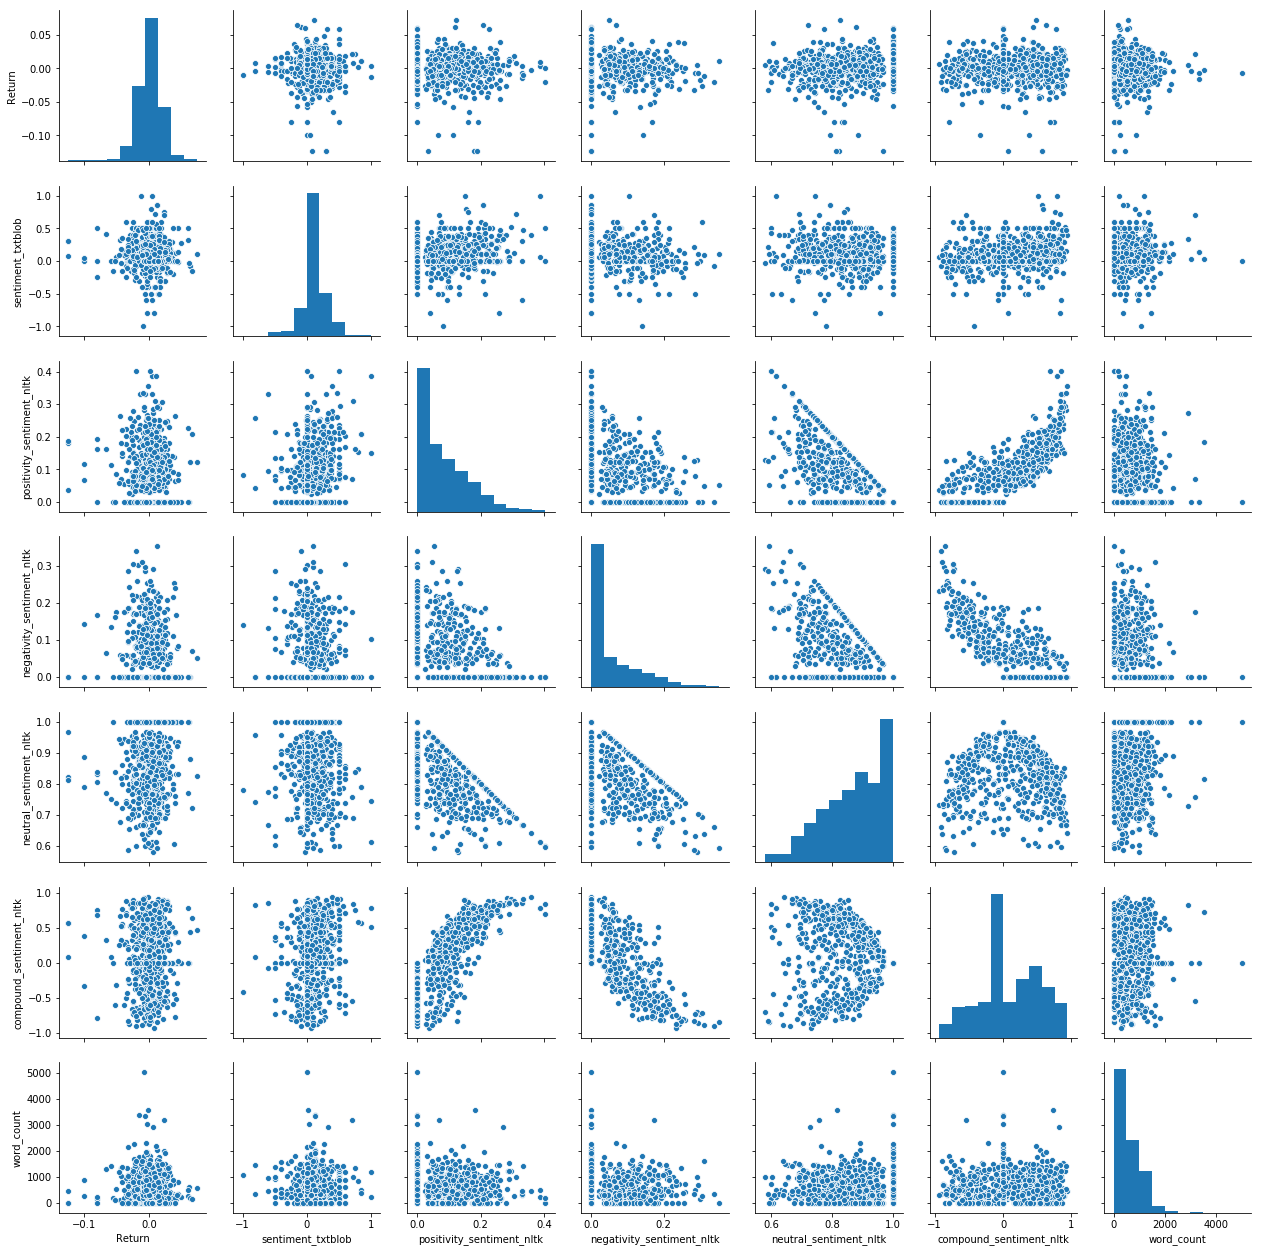

In [86]:
sns.pairplot(df_filtered[["Return", "sentiment_txtblob", "positivity_sentiment_nltk", "negativity_sentiment_nltk", 
                          "neutral_sentiment_nltk", "compound_sentiment_nltk", "word_count"]])

C:\Users\ksjag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


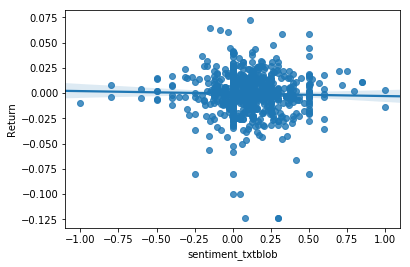

In [87]:
## relationship between both sentiment scores
sns.regplot(x="sentiment_txtblob", y="Return", data=df_filtered)

C:\Users\ksjag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


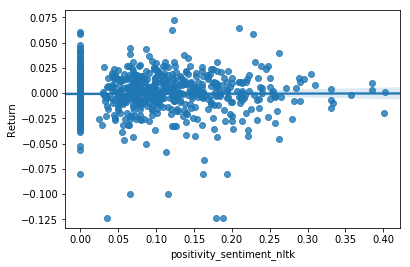

In [88]:
## relationship between both sentiment scores
sns.regplot(x="positivity_sentiment_nltk", y="Return", data=df_filtered)

C:\Users\ksjag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


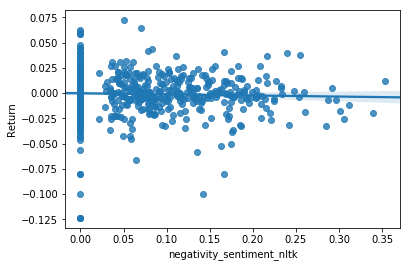

In [89]:
sns.regplot(x="negativity_sentiment_nltk", y="Return", data=df_filtered)

C:\Users\ksjag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


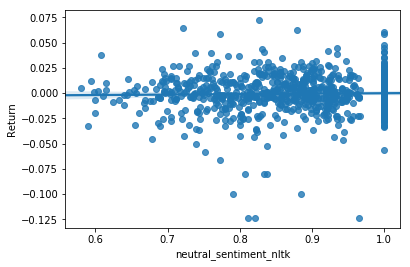

In [90]:
sns.regplot(x="neutral_sentiment_nltk", y="Return", data=df_filtered)

C:\Users\ksjag\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


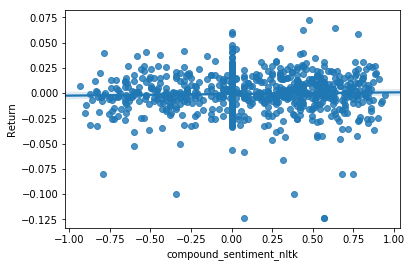

In [91]:
sns.regplot(x="compound_sentiment_nltk", y="Return", data=df_filtered)

In [92]:
corr = df_filtered[['word_count', 'sentiment_txtblob', 'positivity_sentiment_nltk',
       'compound_sentiment_nltk', 'negativity_sentiment_nltk','neutral_sentiment_nltk', "Return", "Label"]].corr()

In [93]:
corr

,word_count,sentiment_txtblob,positivity_sentiment_nltk,compound_sentiment_nltk,negativity_sentiment_nltk,neutral_sentiment_nltk,Return,Label
word_count,1.000000,0.032763,0.058275,0.046538,-0.001559,-0.045083,-0.006561,-0.022320
sentiment_txtblob,0.032763,1.000000,0.200697,0.218842,-0.098910,-0.090948,-0.025272,-0.013468
positivity_sentiment_nltk,0.058275,0.200697,1.000000,0.723853,-0.098066,-0.726260,0.004437,0.065212
compound_sentiment_nltk,0.046538,0.218842,0.723853,1.000000,-0.680370,-0.104785,0.034511,0.069698
negativity_sentiment_nltk,-0.001559,-0.098910,-0.098066,-0.680370,1.000000,-0.612881,-0.038707,-0.041048
neutral_sentiment_nltk,-0.045083,-0.090948,-0.726260,-0.104785,-0.612881,1.000000,0.023216,-0.023387
Return,-0.006561,-0.025272,0.004437,0.034511,-0.038707,0.023216,1.000000,0.685895
Label,-0.022320,-0.013468,0.065212,0.069698,-0.041048,-0.023387,0.685895,1.000000


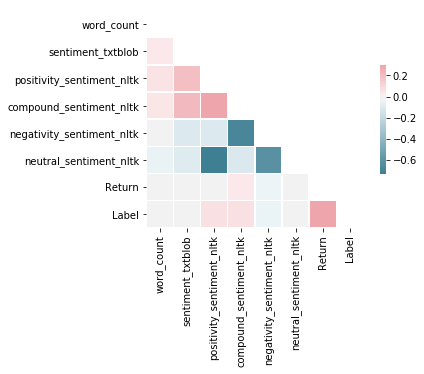

In [94]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Get the final dataframe of features

In [95]:
df_filtered.columns

Index(['Date', 'word_count', 'text_label', 'Label', 'Return', 'text_lem_lst',
       'text_lem_str', 'sentiment_txtblob', 'positivity_sentiment_nltk',
       'compound_sentiment_nltk', 'negativity_sentiment_nltk',
       'neutral_sentiment_nltk'],
      dtype='object')

### Grid Search on Best Parameters

In [96]:
### Grid Search on vectorizer parameters
params = {"stop_words": ["english", None], "ngram_range":[(1, 1), (1, 2)],
         "max_df":[0.3, 0.7]}
params

{'max_df': [0.3, 0.7],
 'ngram_range': [(1, 1), (1, 2)],
 'stop_words': ['english', None]}

In [97]:
## do a train-test split on the data
X_train, X_test, y_train, y_test = train_test_split(df_filtered["text_label"], df_filtered["Label"])

In [98]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(606,)
(606,)
(203,)
(203,)


In [99]:
nb = MultinomialNB()

In [100]:
for stop_words in params["stop_words"]:
    for ngram_range in params["ngram_range"]:
        for max_df in params["max_df"]:
            print("Stop Words:", stop_words)
            print("N-Gram Range:", ngram_range)
            print("Max Df:", max_df)
            this_vect = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words, analyzer="word", max_df=max_df)
            
            
            X_train_dtm = this_vect.fit_transform(X_train)
            X_test_dtm = this_vect.transform(X_test)
            
            nb.fit(X_train_dtm, y_train)
            y_pred_class = nb.predict(X_test_dtm)

            # Get the training accuracy
            print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
            # print the accuracy of its predictions
            print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
            
            actual_rtns = df["Return"].loc[y_test.index]
            model_rtns = actual_rtns * y_pred_class
            print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")
            
            print("--------------------------------")

Stop Words: english
N-Gram Range: (1, 1)
Max Df: 0.3
Training Accuracy:  0.9884488448844885
Test Accuracy:  0.5467980295566502
Returns:  126.3711484640436 %
--------------------------------
Stop Words: english
N-Gram Range: (1, 1)
Max Df: 0.7
Training Accuracy:  0.9884488448844885
Test Accuracy:  0.5467980295566502
Returns:  126.3711484640436 %
--------------------------------
Stop Words: english
N-Gram Range: (1, 2)
Max Df: 0.3
Training Accuracy:  1.0
Test Accuracy:  0.5714285714285714
Returns:  130.98998154695164 %
--------------------------------
Stop Words: english
N-Gram Range: (1, 2)
Max Df: 0.7
Training Accuracy:  1.0
Test Accuracy:  0.5714285714285714
Returns:  130.98998154695164 %
--------------------------------
Stop Words: None
N-Gram Range: (1, 1)
Max Df: 0.3
Training Accuracy:  0.9834983498349835
Test Accuracy:  0.541871921182266
Returns:  116.5847899213484 %
--------------------------------
Stop Words: None
N-Gram Range: (1, 1)
Max Df: 0.7
Training Accuracy:  0.9834983498

In [101]:
## Benchmark Returns and Perfect foresight returns
actual_rtns = df["Return"].loc[y_test.index]
benchmark_rtns = list(np.cumprod(1+model_rtns))[-1]*100
print("Benchmark Returns: ", benchmark_rtns)


Benchmark Returns:  104.98698967389211


In [102]:
perfect_sig = pd.Series(map(lambda x: 1 if x>0 else -1, actual_rtns))
actual_rtns.reset_index(inplace = True, drop = True)
perfect_rtns = actual_rtns * perfect_sig

print("PERFECT FORESIGHT RTNS:", list(np.cumprod(1+perfect_rtns))[-1]*100)

PERFECT FORESIGHT RTNS: 1859.1585694941657


In [103]:
## BEST PARAMS:
## ngram (1,2)
## max_df 0.5
# stop words: None

### 4. Ensemble Methods

In [105]:

# Defininig the ensemble model class 

class EnsembleClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    # returns the classification based on majority of votes
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.predict(features)
            votes.append(v)
        return mode(votes)
    # a simple measurement the degree of confidence in the classification 
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.predict(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered[["word_count",
                                                         "sentiment_txtblob",
                                                        "positivity_sentiment_nltk",
                                                        "negativity_sentiment_nltk",
                                                        "neutral_sentiment_nltk"]], df["Label"])

#this_vect = CountVectorizer(ngram_range=(1, 2), stop_words="english", analyzer="word", max_df=0.5)



In [107]:
X_train.head()

,word_count,sentiment_txtblob,positivity_sentiment_nltk,negativity_sentiment_nltk,neutral_sentiment_nltk
318,1483,-0.078125,0.168,0.187,0.645
467,600,0.500000,0.000,0.000,1.000
614,437,0.166667,0.191,0.106,0.704
688,302,0.000000,0.257,0.132,0.610
719,1165,0.000000,0.000,0.000,1.000


In [108]:
X_train_dtm = this_vect.fit_transform(X_train)
X_test_dtm = this_vect.transform(X_test)

In [109]:
#X_train_dtm

In [110]:
# MNB_clf = MultinomialNB()
# MNB_clf.fit(X_train, y_train)

BNB_clf = BernoulliNB()
BNB_clf.fit(X_train, y_train)

LogReg_clf = LogisticRegression()
LogReg_clf.fit(X_train, y_train)

SGD_clf = SGDClassifier()
SGD_clf.fit(X_train, y_train)

SVC_clf = SVC()
SVC_clf.fit(X_train, y_train)

C:\Users\ksjag\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
ensemble_clf = EnsembleClassifier(SVC_clf, BNB_clf, LogReg_clf, SGD_clf)

In [112]:
svc_pred = SVC_clf.predict(X_test)
#mnb_pred = MNB_clf.predict(X_test_dtm)
bnb_pred = BNB_clf.predict(X_test)
logreg_pred = LogReg_clf.predict(X_test)
sgd_pred = SGD_clf.predict(X_test)

In [113]:
ensemble_pred = np.add(svc_pred, bnb_pred + logreg_pred + sgd_pred)/4

In [114]:
actual_rtns = df["Return"].loc[y_test.index]
model_rtns = actual_rtns * ensemble_pred
print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")

Returns:  97.77775187328044 %


### Ensemble Performance not that great -- test individual performance

In [115]:
## SVC model
actual_rtns = df_filtered["Return"].loc[y_test.index]
model_rtns = actual_rtns * svc_pred
print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")

print('Training Accuracy: ', metrics.accuracy_score(y_train, SVC_clf.predict(X_train)))
# print the accuracy of its predictions
print('Test Accuracy: ', metrics.accuracy_score(y_test, svc_pred))

Returns:  163.6997239481088 %
Training Accuracy:  0.8201320132013201
Test Accuracy:  0.5172413793103449


In [116]:
# ## MNB model
# actual_rtns = df_filtered["Return"].loc[y_test.index]
# model_rtns = actual_rtns * mnb_pred
# print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")

In [117]:
## BNB model
actual_rtns = df_filtered["Return"].loc[y_test.index]
model_rtns = actual_rtns * bnb_pred
print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")

print('Training Accuracy: ', metrics.accuracy_score(y_train, BNB_clf.predict(X_train)))
# print the accuracy of its predictions
print('Test Accuracy: ', metrics.accuracy_score(y_test, bnb_pred))

Returns:  64.56770631587224 %
Training Accuracy:  0.5445544554455446
Test Accuracy:  0.47783251231527096


In [118]:
## LogReg model
actual_rtns = df_filtered["Return"].loc[y_test.index]
model_rtns = actual_rtns * logreg_pred
print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")

print('Training Accuracy: ', metrics.accuracy_score(y_train, LogReg_clf.predict(X_train)))
# print the accuracy of its predictions
print('Test Accuracy: ', metrics.accuracy_score(y_test, logreg_pred))

Returns:  77.87713350850383 %
Training Accuracy:  0.5379537953795379
Test Accuracy:  0.458128078817734


In [119]:
## SGD model
actual_rtns = df_filtered["Return"].loc[y_test.index]
model_rtns = actual_rtns * sgd_pred
print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")

print('Training Accuracy: ', metrics.accuracy_score(y_train, SGD_clf.predict(X_train)))
# print the accuracy of its predictions
print('Test Accuracy: ', metrics.accuracy_score(y_test, sgd_pred))

Returns:  93.07126692717041 %
Training Accuracy:  0.4735973597359736
Test Accuracy:  0.5369458128078818


### Ensemble again with BNB, SGD & LogReg

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered[["word_count",
                                                         "sentiment_txtblob",
                                                        "positivity_sentiment_nltk",
                                                        "negativity_sentiment_nltk",
                                                        "neutral_sentiment_nltk"]], df["Label"])

#this_vect = CountVectorizer(ngram_range=(1, 2), stop_words=None, analyzer="word", max_df=0.5)

In [121]:
SVC_clf = SVC()
SVC_clf.fit(X_train, y_train)

LogReg_clf = LogisticRegression()
LogReg_clf.fit(X_train, y_train)

SGD_clf = SGDClassifier()
SGD_clf.fit(X_train, y_train)

C:\Users\ksjag\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [122]:
svc_pred = SVC_clf.predict(X_test)
logreg_pred = LogReg_clf.predict(X_test)
sgd_pred = SGD_clf.predict(X_test)

In [123]:
ensemble_pred = np.ones(shape=logreg_pred.shape)
for i in range(len(logreg_pred)):
    if (svc_pred[i] == logreg_pred[i] or svc_pred[i] == sgd_pred[i]):
        ensemble_pred[i] = svc_pred[i]
    elif (logreg_pred[i] == sgd_pred[i]):
        ensemble_pred[i] = logreg_pred[i]


In [124]:
## evaluate ensemble model

actual_rtns = df_filtered["Return"].loc[y_test.index]
model_rtns = actual_rtns * ensemble_pred
print("Returns: ", list(np.cumprod(1+model_rtns))[-1]*100, "%")
print('Test Accuracy: ', metrics.accuracy_score(y_test, sgd_pred))

Returns:  103.92216391092157 %
Test Accuracy:  0.4729064039408867
